In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:\\Users\\HP\\Downloads\\purchase.csv")
#print(df)
df.head()
print(df.isnull().sum())


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
from sklearn.preprocessing import LabelEncoder
df[['Gender']]= df[['Gender']].apply(LabelEncoder().fit_transform)
print(df)
X = df.iloc[:,[1,2,3]].values   #:all rows column last 1 delete
Y = df.iloc[:,-1].values

print(X)
print(Y)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]
[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

print('Shape of X_train =',X_train.shape)
print('Shape of Y_train =',Y_train.shape)
print('Shape of X_train =',X_test.shape)
print('Shape of Y_train =',Y_test.shape)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

Shape of X_train = (320, 3)
Shape of Y_train = (320,)
Shape of X_train = (80, 3)
Shape of Y_train = (80,)


LinearRegression()

In [12]:
#Fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p = 1)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [14]:
#preddecting the test results
Y_pred = classifier.predict(X_test)
print(Y_pred)
print(Y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[53  5]
 [ 7 15]]


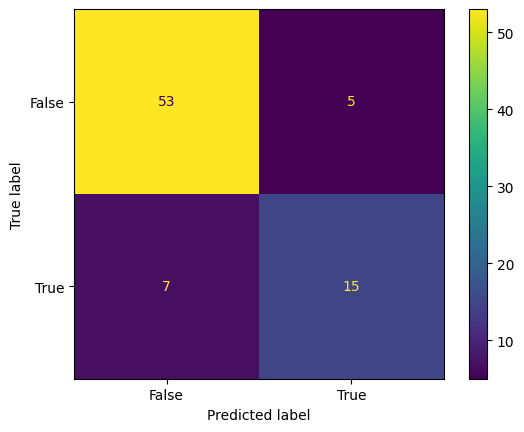

In [16]:

from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(Y_test,Y_pred,labels=classifier.classes_)
color='white'
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.show()

In [17]:
from sklearn import metrics


Accuracy=metrics.accuracy_score(Y_test,Y_pred)
print(Accuracy)
Precision=metrics.precision_score(Y_test,Y_pred)
print(Precision)
Sensitivity_recall=metrics.recall_score(Y_test,Y_pred)
print(Sensitivity_recall)
F1_score=metrics.f1_score(Y_test,Y_pred)
print(F1_score)

0.85
0.75
0.6818181818181818
0.7142857142857143


In [21]:
classifier.predict([X_test[7,:]])


array([1], dtype=int64)

In [20]:
X_test[7,:]

array([     1,     36, 144000], dtype=int64)

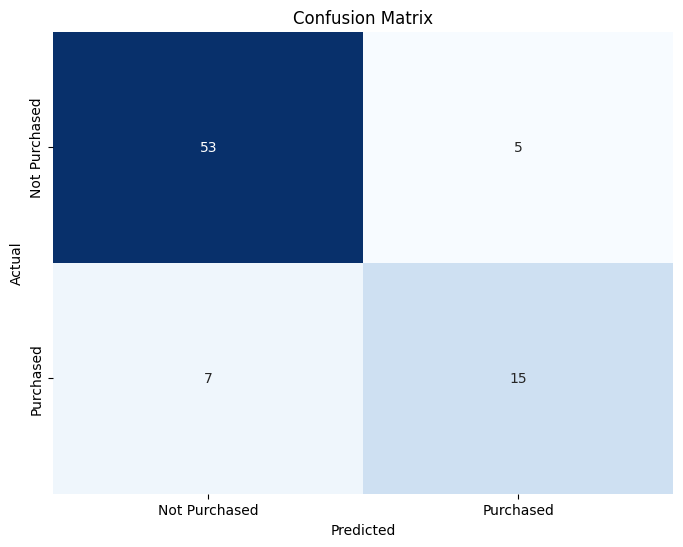

In [19]:
# prediction = knn.predict(new_data)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Purchased', 'Purchased'], 
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()